In [1]:
# This workbook is for practicing/creating financial charts and analysis
# Base code from Seminar on "Why Python is huge in finance? by Daniel Roos" 
# BootStrap sample from https://www.pythonforfinance.net/

# To enable directory browsing on Home Page in Jupyter Notebook
# Open anaconda cmd prompt, execute 'jupyter notebook --generate-config'
# config file is created at C:\Users\[user]\.jupyter\
# uncomment/enable the following flag and add directory path 
# c.NotebookApp.notebook_dir = 'C:\\[dir path here]' 

import os
import random
import pandas_datareader.data as web
import pandas as pd
import datetime
import numpy as np
from ipywidgets import interact, fixed, IntSlider
import matplotlib.pyplot as plt
from numpy.linalg import cholesky
import seaborn as sns

#cache data for period
all_data_start, all_data_end = '2019-05-01','2020-05-01'
# By default work with adta in this period
default_start, default_end = '2019-03-15','2020-05-01'

C:\Users\shobh\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [26]:
#set up the Quandl Api Key (need to be executed once - can use python cmd promt)
#os.environ['QUANDL_API_KEY'] = "Key Here"

## Get Stock Data

In [59]:
"""QUANDL"""
#pandas datareader
aapl = web.DataReader('AAPL.US', 'quandl', '2018-01-01', '2019-01-01')
#aapl = web.DataReader('AAPL.US', 'quandl', '2019-02-01', '2019-03-01')

In [60]:
aapl.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-27,173.68,175.15,166.92,168.340,38962839.0,0.0,1.0,173.68,175.15,166.92,168.340,38962839.0
2018-03-26,168.07,173.10,166.44,172.770,36272617.0,0.0,1.0,168.07,173.10,166.44,172.770,36272617.0
2018-03-23,168.39,169.92,164.94,164.940,40248954.0,0.0,1.0,168.39,169.92,164.94,164.940,40248954.0
2018-03-22,170.00,172.68,168.60,168.845,41051076.0,0.0,1.0,170.00,172.68,168.60,168.845,41051076.0
2018-03-21,175.04,175.09,171.26,171.270,35247358.0,0.0,1.0,175.04,175.09,171.26,171.270,35247358.0


In [109]:
aapl.Close.plot()

# to search between date range - both works
# aapl['2018-03-21': '2018-03-20'] #does not work with yfinance df return type 
# aapl.loc['2018-03-21': '2018-03-20'] #always work

#To take account of stock split use AdjClose 
#aapl.AdjClose.plot()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2018-03-21,175.04,175.09,171.26,171.27,35247358.0,0.0,1.0,175.04,175.09,171.26,171.27,35247358.0
2018-03-20,175.24,176.80,174.94,175.24,19314039.0,0.0,1.0,175.24,176.80,174.94,175.24,19314039.0


In [ ]:
#not available in quandl/last 1 year data not available in quandl free account
#uso = web.DataReader('T.US', 'quandl', '2019-01-01', '2019-05-01')

In [62]:
"""yfinance"""
#using yfinance instead

import yfinance as yf
yf.pdr_override()

uso = yf.Ticker("USO")
hist = uso.history(period="1y")

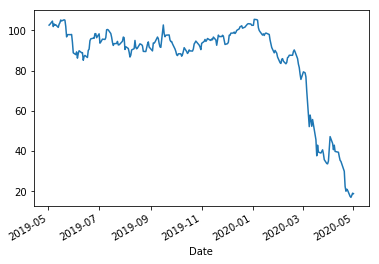

In [121]:
# this is already adjusted for stock splits

hist['Close'].plot()
#hist['Close'].plot(figsize=(16, 9))

## Cache Stock Data

In [5]:
# Function to cache new data/load cache data
#cached_data = {} #dict
def stock_hist(symbol, start = None, end = None):
    """function to get cached data"""
    start = start if start else default_start #if none, set default value
    end = end if end else default_end
    if not symbol in cached_data:
        """quindl"""
        #cached_data[symbol] = web.DataReader(symbol + '.US', 'quandl', all_data_start, all_data_end)
        """yfinance"""
        #get entire data for default period
        cached_data[symbol] = web.get_data_yahoo(symbol, all_data_start, all_data_end)
        print(f"Loaded {symbol} rows in cache: {len(cached_data[symbol])}")
    return cached_data[symbol].loc[start:end]

In [126]:
stock_hist("USO", "2020-01-01", "2020-05-01")

Loaded USO rows in cache: 254


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,102.800003,101.599998,102.400002,102.480003,1563600.0,102.480003
2020-01-03,106.559998,104.239998,106.160004,105.440002,4325500.0,105.440002
2020-01-06,106.559998,104.959999,106.400002,105.279999,2598400.0,105.279999
2020-01-07,105.440002,104.080002,104.800003,105.040001,1742100.0,105.040001
2020-01-08,104.559998,99.120003,104.480003,101.279999,6918400.0,101.279999
...,...,...,...,...,...,...
2020-04-27,18.400000,17.040001,18.400000,17.520000,33885000.0,17.520000
2020-04-28,18.000000,16.879999,17.280001,17.040001,155814800.0,17.040001
2020-04-29,18.219999,17.459999,18.010000,18.000000,23378600.0,18.000000


In [126]:
type(cached_data)

dict

In [48]:
"""Dump Data"""
def dump_CacheData():
    try:
        import cPickle as pickle
    except ImportError:  # python 3.x
        import pickle
        
    #dump cache in file folder
    with open('data.p', 'wb') as fp:
        pickle.dump(cached_data, fp, protocol=pickle.HIGHEST_PROTOCOL)

In [49]:
dump_CacheData()

In [7]:
cached_data = {}
def load_CacheData():
    try:
        import cPickle as pickle
    except ImportError:  # python 3.x
        import pickle
        
    #load dump cache from file folder
    with open('data.p', 'rb') as fp:
        cached_data = pickle.load(fp)

In [8]:
cached_data = {}
load_CacheData()

In [128]:
print(cached_data["USO"])

                  High         Low        Open       Close       Volume  \
Date                                                                      
2019-05-01  106.480003  104.480003  106.239998  105.760002    3221400.0   
2019-05-02  103.519997  101.519997  103.360001  102.559998    5288600.0   
2019-05-03  104.080002  102.800003  102.959999  102.959999    3274200.0   
2019-05-06  104.879997  102.320000  102.320000  104.559998    4741500.0   
2019-05-07  102.800003  101.040001  102.239998  101.839996    3743100.0   
...                ...         ...         ...         ...          ...   
2020-04-27   18.400000   17.040001   18.400000   17.520000   33885000.0   
2020-04-28   18.000000   16.879999   17.280001   17.040001  155814800.0   
2020-04-29   18.219999   17.459999   18.010000   18.000000   23378600.0   
2020-04-30   19.299999   17.860001   18.760000   19.120001   24001300.0   
2020-05-01   19.180000   18.420000   19.120001   18.860001   13814700.0   

             Adj Close  

In [30]:
# if dates/data not available in data cache 
# then append the new dates/data to data_cache

new_data = {}
if (cached_data["USO"].get("2019-04-25") == None): #dict key check
        new_data["USO"] = web.get_data_yahoo("USO", "2019-04-25", all_data_start)

In [114]:
new_data["USO"]

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-25,109.839996,108.000000,109.519997,108.239998,2195300.0,108.239998
2019-04-26,107.120003,103.680000,107.040001,104.720001,5269300.0,104.720001
2019-04-29,106.000000,104.400002,105.199997,105.839996,2926300.0,105.839996
2019-04-30,106.879997,105.440002,106.800003,106.320000,2096400.0,106.320000
2019-05-01,106.480003,104.480003,106.239998,105.760002,3221400.0,105.760002


In [113]:
type(cached_data["USO"])

pandas.core.frame.DataFrame

In [129]:
# merge new data to cached data (and Remove any duplicates)
# append does not verify integrity of keys/index (using drop_duplicates)

cached_data["USO"] = (cached_data["USO"].append(new_data["USO"])).drop_duplicates()

In [130]:
print(cached_data["USO"].loc["2019-05-01"])

                  High         Low        Open       Close     Volume  \
Date                                                                    
2019-05-01  106.480003  104.480003  106.239998  105.760002  3221400.0   

             Adj Close  
Date                    
2019-05-01  105.760002  


In [137]:
# sort the datetime index in Dataframe after the new append

cached_data["USO"] = cached_data["USO"].sort_index()

In [138]:
#check index 
cached_data["USO"].index

DatetimeIndex(['2019-04-25', '2019-04-26', '2019-04-29', '2019-04-30',
               '2019-05-01', '2019-05-02', '2019-05-03', '2019-05-06',
               '2019-05-07', '2019-05-08',
               ...
               '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23',
               '2020-04-24', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-04-30', '2020-05-01'],
              dtype='datetime64[ns]', name='Date', length=258, freq=None)

In [47]:
dump_CacheData()

NameError: name 'dump_CacheData' is not defined

## Look at a basket of Stocks (visualizing the portfolio)

In [12]:
tickers = ["AAPL", "FB", "GOOG", "^GSPC"]
N = len(tickers)
historical = pd.concat((stock_hist(symbol) for symbol in tickers), axis = 1, keys = ["AAPL","FB", "GOOG", "^GSPC"])
#type(historical)
historical

AAPL                                                  \
                  High         Low        Open       Close      Volume   
Date                                                                     
2019-05-01  215.309998  209.229996  209.880005  210.520004  64827300.0   
2019-05-02  212.649994  208.130005  209.839996  209.149994  31996300.0   
2019-05-03  211.839996  210.229996  210.889999  211.750000  20892400.0   
2019-05-06  208.839996  203.500000  204.289993  208.479996  32443100.0   
2019-05-07  207.419998  200.830002  205.880005  202.860001  38763700.0   
...                ...         ...         ...         ...         ...   
2020-04-27  284.540009  279.950012  281.799988  283.170013  29271900.0   
2020-04-28  285.829987  278.200012  285.079987  278.579987  28001200.0   
2020-04-29  289.670013  283.890015  284.730011  287.730011  34320200.0   
2020-04-30  294.529999  288.350006  289.959991  293.799988  45766000.0   
2020-05-01  299.000000  285.850006  286.250000  289.070007  60095200.0   

                                FB                                      ...  \
             Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2019-05-01  207.800110  196.179993  193.009995  194.779999  193.029999  ...   
2019-05-02  206.447800  194.000000  189.750000  193.000000  192.529999  ...   
2019-05-03  209.014221  196.160004  193.710007  194.380005  195.470001  ...   
2019-05-06  205.786469  194.279999  190.550003  191.240005  193.880005  ...   
2019-05-07  200.239075  192.899994  187.850006  192.539993  189.770004  ...   
...                ...         ...         ...         ...         ...  ...   
2020-04-27  283.170013  193.750000  187.410004  192.660004  187.500000  ...   
2020-04-28  278.579987  189.199997  182.559998  188.660004  182.910004  ...   
2020-04-29  287.730011  196.910004  190.000000  190.929993  194.190002  ...   
2020-04-30  293.799988  209.690002  201.570007  206.919998  204.710007  ...   
2020-05-01  289.070007  207.279999  199.050003  201.600006  202.270004  ...   

                   GOOG                                           ^GSPC  \
                   Open        Close   Volume    Adj Close         High   
Date                                                                      
2019-05-01  1188.050049  1168.079956  2639200  1168.079956  2954.129883   
2019-05-02  1167.760010  1162.609985  1944800  1162.609985  2931.679932   
2019-05-03  1173.650024  1185.400024  1980700  1185.400024  2947.850098   
2019-05-06  1166.260010  1189.390015  1563900  1189.390015  2937.320068   
2019-05-07  1180.469971  1174.099976  1551400  1174.099976  2913.030029   
...                 ...          ...      ...          ...          ...   
2020-04-27  1296.000000  1275.880005  1600600  1275.880005  2887.719971   
2020-04-28  1287.930054  1233.670044  2951300  1233.670044  2921.149902   
2020-04-29  1341.459961  1341.479980  3793600  1341.479980  2954.860107   
2020-04-30  1324.880005  1348.660034  2668900  1348.660034  2930.909912   
2020-05-01  1328.500000  1320.609985  2072500  1320.609985  2869.090088   

                                                                            
                    Low         Open        Close      Volume    Adj Close  
Date                                                                        
2019-05-01  2923.360107  2952.330078  2923.729980  3645850000  2923.729980  
2019-05-02  2900.500000  2922.159912  2917.520020  3778890000  2917.520020  
2019-05-03  2929.209961  2929.209961  2945.639893  3338120000  2945.639893  
2019-05-06  2898.209961  2908.889893  2932.469971  3181520000  2932.469971  
2019-05-07  2862.600098  2913.030029  2884.050049  3767100000  2884.050049  
...                 ...          ...          ...         ...          ...  
2020-04-27  2852.889893  2854.649902  2878.479980  5194260000  2878.479980  
2020-04-28  2860.709961  2909.959961  2863.389893  56

In [13]:
#historical = historical.loc[:,(slice(None), 'Close')]
historical = historical.xs("Close",level =1, axis = 1)

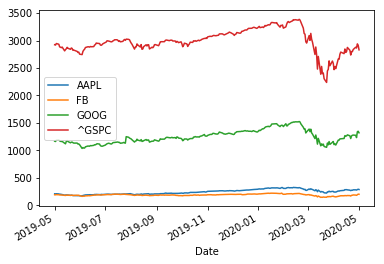

In [14]:
_=historical.plot()

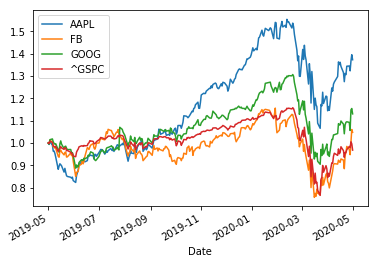

In [15]:
#relative change of stocks

returns = (historical/historical.iloc[0]) #unit vector

#if data set has missing data (do a backfill)
#returns = (historical/historical.iloc[0]).fillna(method="backfill")

_=returns.plot()

## What if I buy all of them (building the portfolio) 

In [16]:
# Example: if bought equal amount of each stock

# slice each row and sum them up
returns["Portfolio"] = returns.iloc[:,0:N].sum(axis=1)/N

In [17]:
returns

,AAPL,FB,GOOG,^GSPC,Portfolio
Date,,,,,
2019-05-01,1.000000,1.000000,1.000000,1.000000,1.000000
2019-05-02,0.993492,0.997410,0.995317,0.997876,0.996024
2019-05-03,1.005843,1.012641,1.014828,1.007494,1.010201
2019-05-06,0.990310,1.004403,1.018244,1.002989,1.003987
2019-05-07,0.963614,0.983111,1.005154,0.986428,0.984577
...,...,...,...,...,...
2020-04-27,1.345098,0.971352,1.092288,0.984523,1.098315
2020-04-28,1.323295,0.947573,1.056152,0.979362,1.076595
2020-04-29,1.366759,1.006009,1.148449,1.005397,1.131653


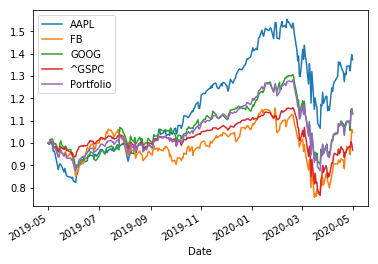

In [18]:
_ = returns.plot()

In [19]:
# Calculating volatality of stocks/portfolio

daily_pct_change = np.log(returns.pct_change()+1)
vols = daily_pct_change.std()*np.sqrt(252)
vols

AAPL         0.407946
FB           0.397868
GOOG         0.364561
^GSPC        0.326086
Portfolio    0.350461
dtype: float64

In [44]:
def diversicheck(symbols, start_days = 0, **active):
    start = datetime.datetime.strptime(all_data_start, "%Y-%m-%d") + datetime.timedelta(days=start_days)
    end = start + datetime.timedelta(days = 367)
    #filtered symbol list
    filtered = [symbol for symbol in symbols if active.get(symbol, True)]
    #print(f"filtered: {filtered}")
    #list of dataframe
    prices = [stock_hist(symbol, start=start, end=end).Close for symbol in filtered]
    #sample = prices[0].Close
    #print(f"prices: {prices}")
    #print(type(prices[0]))
    unit_pos = [p / p[0] for p in prices]
    #print(f"unit_pos: {unit_pos}")
    basket = sum(u for u in unit_pos)/len(unit_pos)
    for p in unit_pos:
        p.plot(color="b", alpha=0.3)
    basket.plot(figsize=(20,10))
    print(f"Backtest from {start} to {end}")
    

In [46]:
prf_stocks =["AAPL", "TSLA", "FB", "IBM", "GOOG"]

#selection widget takes key value pair
active = dict(zip(prf_stocks,[True]*len(prf_stocks)))

_=interact(diversicheck, symbols=fixed(prf_stocks),start_days=IntSlider(min=0, max=367, step=10, value=10), **active)

interactive(children=(IntSlider(value=10, description='start_days', max=367, step=10), Checkbox(value=True, de…

## Simulation (Analyzing the Portfolio)

In [54]:
prf_prices = pd.concat((stock_hist(symbol) for symbol in prf_stocks), axis = 1, keys = prf_stocks).xs("Close",level =1, axis = 1)
prf_returns = (prf_prices.pct_change() + 1)[1:]
log_returns = np.log(prf_returns)
corr = log_returns.corr()

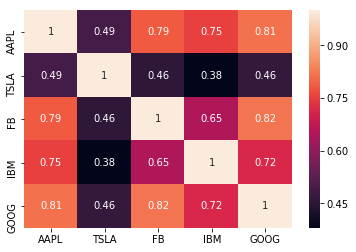

In [55]:
sns.heatmap(corr, annot= True)

In [57]:
vols = log_returns.std()*np.sqrt(252)
avg_return = (prf_returns-1).mean()

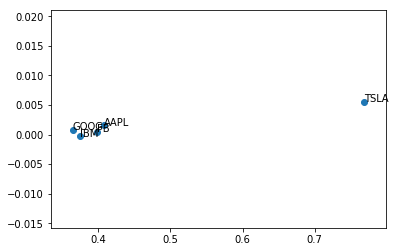

In [61]:
fig, ax = plt.subplots()
ax.scatter(vols,avg_return)
for i, txt in enumerate(prf_stocks):
    ax.annotate(txt, (vols[i], avg_return[i]))

In [64]:
# Monte Carlo Simulation



simulated = pd.DataFrame([((prf_returns.iloc[random.choices(range(len(prf_returns)), k= 60)]).mean(axis=1)).cumprod().values for x in range(1000)]).T
simulated.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.001145,0.949821,1.021244,0.994113,0.993024,1.020178,1.001711,0.983956,0.869974,0.998106,...,0.995499,0.992272,1.010357,1.035749,0.981659,1.052244,1.011982,0.994156,0.989018,1.014166
1,1.001162,0.992086,0.953290,0.992230,0.997448,1.033598,1.007163,0.984610,0.883847,0.978670,...,0.984567,0.995499,1.032692,1.050974,0.997314,1.068748,1.012026,0.987158,1.005157,0.928917
2,1.010872,1.004752,0.947957,1.007878,0.979154,1.057738,1.024158,1.036050,0.892419,1.026015,...,1.028377,0.987805,1.025330,1.046940,0.991443,1.073297,1.064898,0.993307,1.017743,0.936223
3,1.011034,1.022501,0.954841,1.001670,0.990260,1.065419,1.094071,1.050727,0.889911,1.030619,...,1.024440,0.994763,1.027706,1.051397,0.991602,1.087264,1.068361,1.003415,1.056301,0.949486
4,0.991346,1.032104,0.952232,1.020720,0.992675,1.011958,1.102953,1.049464,0.889949,1.037878,...,0.973035,0.985437,1.026930,1.037521,0.979301,1.102321,1.054461,1.012018,1.041267,0.957627


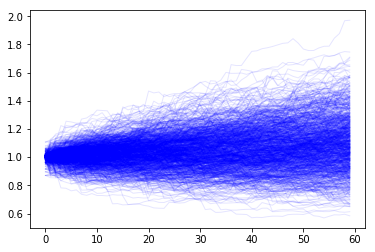

In [66]:
simulated.plot(legend=False, linewidth = 1, alpha=0.1, color='blue')

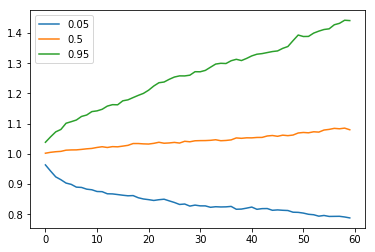

In [68]:
simulated.quantile([0.05, 0.50, 0.95], axis = 1).T.plot()